# Lung Cancer Prediction

In [1]:
# Import libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load datasets 

In [4]:
df = pd.read_csv("D:\DataSets\Lung_Cancer_Prediction.csv")

In [5]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


# 1 . Data Preprocessing 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [54]:
df['Alcohol use'].value_counts()

2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: Alcohol use, dtype: int64

In [7]:
# Check Missing value

In [8]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [9]:
# Print Statistical Analysis 

In [10]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [11]:
# Check Data types

In [12]:
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [13]:
# Check Columns

In [15]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [16]:
# Check Imbalnced data 

In [17]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

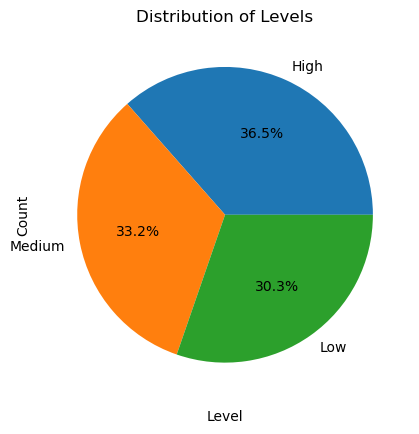

In [18]:
# Assuming df is your DataFrame
df['Level'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

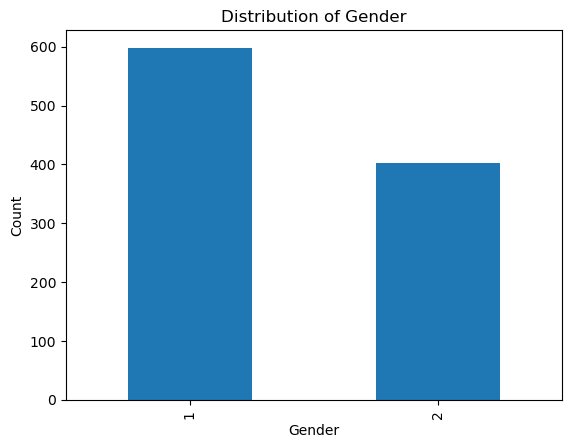

In [19]:
# ploting of gender 
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [41]:
# Plot heatmap of dataframe

In [61]:
heat =df.corr()

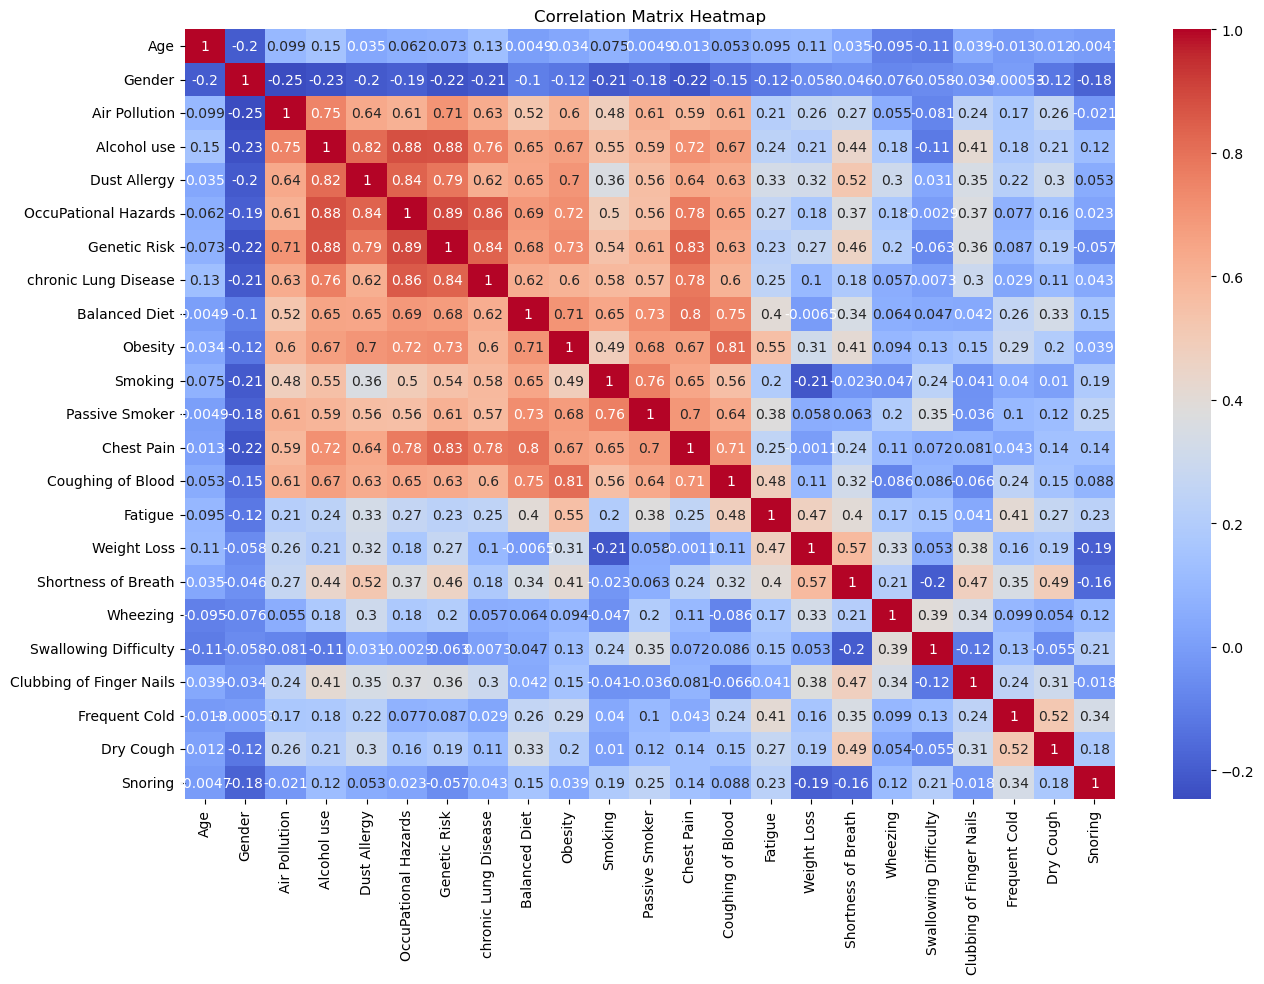

In [62]:
# ploting the heatmap
plt.figure(figsize = (15,10))
sns.heatmap(heat,annot = True,cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [59]:
df=df.drop(columns =['index'] ,axis = 1)

In [43]:
# Check strong and low correlation 

In [63]:
Strong_Corr = heat[heat > 0.7]
Low_Corr = heat[heat < 0.7]

In [64]:
Strong_Corr.sum()

Age                         1.000000
Gender                      1.000000
Air Pollution               2.452569
Alcohol use                 5.802750
Dust Allergy                4.143083
OccuPational Hazards        5.963788
Genetic Risk                6.661246
chronic Lung Disease        4.240737
Balanced Diet               3.975306
Obesity                     4.674420
Smoking                     1.761622
Passive Smoker              2.486744
Chest Pain                  5.617623
Coughing of Blood           3.272017
Fatigue                     1.000000
Weight Loss                 1.000000
Shortness of Breath         1.000000
Wheezing                    1.000000
Swallowing Difficulty       1.000000
Clubbing of Finger Nails    1.000000
Frequent Cold               1.000000
Dry Cough                   1.000000
Snoring                     1.000000
dtype: float64

In [65]:
Low_Corr.sum()

Age                         0.604068
Gender                     -3.175736
Air Pollution               6.503777
Alcohol use                 4.931359
Dust Allergy                6.346157
OccuPational Hazards        4.482256
Genetic Risk                3.999868
chronic Lung Disease        5.231818
Balanced Diet               6.009043
Obesity                     5.796380
Smoking                     5.561482
Passive Smoker              6.816823
Chest Pain                  4.109929
Coughing of Blood           6.200074
Fatigue                     5.913898
Weight Loss                 3.610638
Shortness of Breath         5.705839
Wheezing                    2.857846
Swallowing Difficulty       1.094318
Clubbing of Finger Nails    3.800661
Frequent Cold               3.983361
Dry Cough                   4.035240
Snoring                     1.538939
dtype: float64

In [66]:
# divide data numerical and categorical data 

In [68]:
num_data = df.select_dtypes(include =['int'])
cat_data = df.select_dtypes(include= ['object'])

In [69]:
num_data.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring'],
      dtype='object')

In [86]:
dataa = num_data.drop(columns =["Age"],axis =1)

In [71]:
# Check Outlier in data 

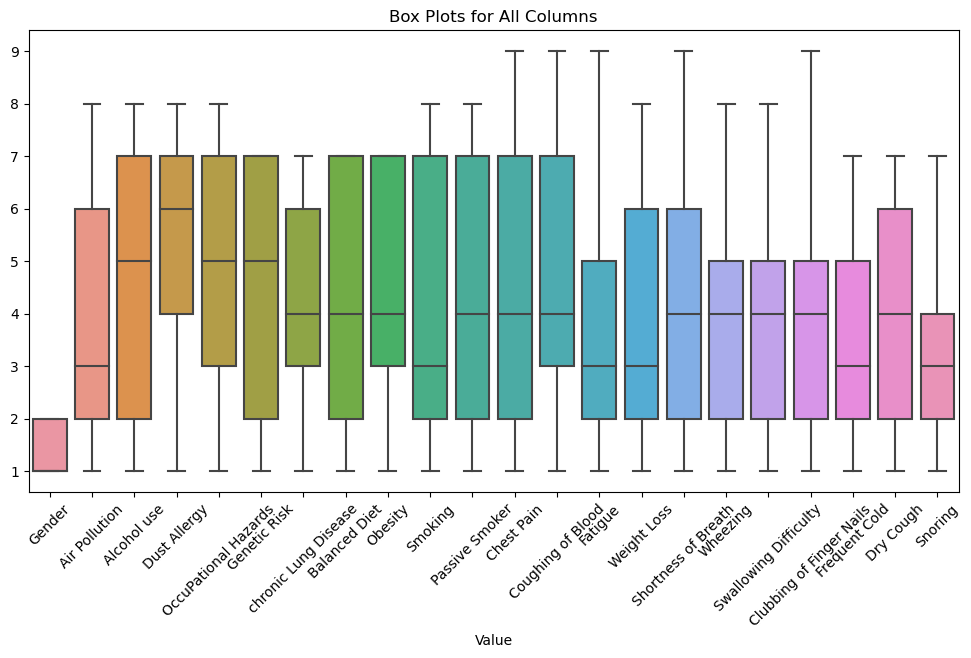

In [87]:
plt.figure( figsize = [12,6])
sns.boxplot(data = dataa , orient="v")
plt.title("Box Plots for All Columns")
plt.xlabel("Value")
plt.xticks(rotation=45)
plt.show()

In [90]:
# Apply some columns label encoding 

In [91]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [92]:
label = LabelEncoder()

In [93]:
df['Level'] = label.fit_transform(df['Level'])

In [95]:
df['Level'].value_counts()

0    365
2    332
1    303
Name: Level, dtype: int64

In [96]:
# Apply minmax scalling 

In [97]:
model = MinMaxScaler()
df.iloc[:,:-1] = model.fit_transform(df.iloc[:,:-1])

In [98]:
# Select only int datatypes to train model

In [100]:
df = df.astype(int)

In [ ]:
# divied data into 

In [108]:
X = df.drop('Level',axis =1)
y = df['Level']

In [101]:
# Train test split

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y ,test_size =0.2 , random_state =42) 

# Model Excutation 

### 1. Decision Tree Classifer 

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [114]:
# Create a Decision Tree Classifier
DT = DecisionTreeClassifier()

In [119]:
# Define hyperparameters and their values to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [120]:
# Perform grid search with cross-validation

In [122]:
Grid = GridSearchCV(DT , param_grid , cv = 5)

In [124]:
Grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [126]:
# Get the best parameters
best_params = Grid.best_params_


In [127]:
# Train the Decision Tree Classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [128]:
# Evaluate the model on the test set
accuracy = best_dt_classifier.score(X_test, y_test)
print(f"Decision Tree Classifier Accuracy: {accuracy}")

Decision Tree Classifier Accuracy: 0.755


### 2. Random forest Classifier 

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
# Craete Random forest Classifier 
RFC = RandomForestClassifier()

In [131]:
# Define hyperparameters and their values to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [133]:
# Perform grid search with cross-validation

In [134]:
Grid_RFC = GridSearchCV(RFC , param_grid ,cv = 5)

In [136]:
Grid_RFC.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [138]:
# Get the best parameters
best_params = Grid_RFC.best_params_

In [144]:
# Train the Decision Tree Classifier with the best parameters
best_RFC = RandomForestClassifier(**best_params)
best_RFC.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=50)

In [145]:
# Evaluate the model on the test set
accuracy = best_RFC.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy: {accuracy}")

Random Forest Classifier Accuracy: 0.755


In [147]:
import joblib

# Download the trained Logistic Regression model
joblib.dump(best_RFC, 'trained_model.joblib')

['trained_model.joblib']